## Команды для терминала


In [61]:
for histone in ('H2A', 'H2B', 'H3', 'H4'):
    for x in ('c.elegans', 
          'ciliate',
          'drosophila',
          'e.coli',
          'human',
          'mouse',
          'yeast',
          'zebrafish',
          'thermococcus',
          'methanocaldococcus',
          'tuberculosis'):
        print(f'blastp -query my_histones/{histone}.fasta -db proteomes/{x}.faa  -out hblasts/{x}{histone}.blast -outfmt 7')

blastp -query my_histones/H2A.fasta -db proteomes/c.elegans.faa  -out hblasts/c.elegansH2A.blast -outfmt 7
blastp -query my_histones/H2A.fasta -db proteomes/ciliate.faa  -out hblasts/ciliateH2A.blast -outfmt 7
blastp -query my_histones/H2A.fasta -db proteomes/drosophila.faa  -out hblasts/drosophilaH2A.blast -outfmt 7
blastp -query my_histones/H2A.fasta -db proteomes/e.coli.faa  -out hblasts/e.coliH2A.blast -outfmt 7
blastp -query my_histones/H2A.fasta -db proteomes/human.faa  -out hblasts/humanH2A.blast -outfmt 7
blastp -query my_histones/H2A.fasta -db proteomes/mouse.faa  -out hblasts/mouseH2A.blast -outfmt 7
blastp -query my_histones/H2A.fasta -db proteomes/yeast.faa  -out hblasts/yeastH2A.blast -outfmt 7
blastp -query my_histones/H2A.fasta -db proteomes/zebrafish.faa  -out hblasts/zebrafishH2A.blast -outfmt 7
blastp -query my_histones/H2A.fasta -db proteomes/thermococcus.faa  -out hblasts/thermococcusH2A.blast -outfmt 7
blastp -query my_histones/H2A.fasta -db proteomes/methanocaldoc

In [62]:
for x in ('c.elegans', 
          'ciliate',
          'drosophila',
          'e.coli',
          'human',
          'mouse',
          'yeast',
          'zebrafish',
          'thermococcus',
          'methanocaldococcus',
          'tuberculosis'):
    print(f'blastp -query KDM6A.fasta -db proteomes/{x}.faa -out blasts/{x}.blast -outfmt 7')

blastp -query KDM6A.fasta -db proteomes/c.elegans.faa -out blasts/c.elegans.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/ciliate.faa -out blasts/ciliate.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/drosophila.faa -out blasts/drosophila.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/e.coli.faa -out blasts/e.coli.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/human.faa -out blasts/human.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/mouse.faa -out blasts/mouse.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/yeast.faa -out blasts/yeast.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/zebrafish.faa -out blasts/zebrafish.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/thermococcus.faa -out blasts/thermococcus.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/methanocaldococcus.faa -out blasts/methanocaldococcus.blast -outfmt 7
blastp -query KDM6A.fasta -db proteomes/tuberculosis.faa -out blasts/tuberculosis.blast 

## Делаем таблицу с e-value

In [63]:
import glob
import pandas as pd
import math
import seaborn as sns

In [64]:
dic = {'protein': ['H2A', 'H2B', 'H3', 'H4', 'KDM6A'],
	   'human': [0] * 5,
	   'mouse': [0] * 5,
       'zebrafish': [0] * 5,
       'drosophila': [0] * 5,
       'c.elegans': [0] * 5,
       'ciliate': [0] * 5,
       'yeast': [0] * 5,
       'methanocaldococcus': [0] * 5,
       'thermococcus': [0] * 5,
       'e.coli': [0] * 5,
       'tuberculosis': [0] * 5,
       }

df = pd.DataFrame(dic).set_index('protein')
df_10 = pd.DataFrame(dic).set_index('protein')
df

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
protein,,,,,,,,,,,
H2A,0,0,0,0,0,0,0,0,0,0,0
H2B,0,0,0,0,0,0,0,0,0,0,0
H3,0,0,0,0,0,0,0,0,0,0,0
H4,0,0,0,0,0,0,0,0,0,0,0
KDM6A,0,0,0,0,0,0,0,0,0,0,0


In [65]:
columns_names = ['query acc.ver',
                 'subject acc.ver',
                 '% identity',
                 'alignment length',
                 'mismatches', 
                 'gap opens',
                 'q.start',
                 'q.end', 
                 's.start', 
                 's.end',
                 'evalue', 
                 'bit score']

In [66]:
for histone in ('H2A', 'H2B', 'H3', 'H4'):
    for column in ('c.elegans', 
          'ciliate',
          'drosophila',
          'e.coli',
          'human',
          'mouse',
          'yeast',
          'zebrafish',
          'thermococcus',
          'methanocaldococcus',
          'tuberculosis'):
        temp = glob.glob(f'/content/{column}{histone}.blast')
        temp = pd.read_csv(temp[0], 
                sep='\t', 
                skiprows=5, 
                names=columns_names
                ).dropna()

        evalue = temp.evalue.min()

        df.loc[[histone], [column]] = evalue     

        if evalue < 1e-100:
            evalue = 1e-100
 
        df_10.loc[[histone], [column]] = -1 * math.log10(evalue) 
        

df

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
protein,,,,,,,,,,,
H2A,1.950000e-88,4.100000e-87,4.770000e-82,4.370000e-68,1.000000e-65,1.020000e-56,6.990000e-63,0.000387,0.003000,1.7,0.430
H2B,2.520000e-88,1.760000e-88,9.040000e-83,2.820000e-60,6.530000e-66,4.570000e-51,5.400000e-60,1.800000,1.200000,1.6,2.200
H3,2.190000e-96,1.540000e-96,1.770000e-95,9.390000e-96,4.460000e-94,8.410000e-86,3.310000e-87,0.034000,0.057000,0.9,4.600
H4,1.090000e-67,7.600000e-68,1.130000e-68,8.020000e-68,6.150000e-68,1.960000e-45,1.080000e-52,0.000082,0.000033,1.3,0.069
KDM6A,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000


In [67]:
for column in ('c.elegans', 
          'ciliate',
          'drosophila',
          'e.coli',
          'human',
          'mouse',
          'yeast',
          'zebrafish',
          'thermococcus',
          'methanocaldococcus',
          'tuberculosis'):
        temp = glob.glob(f'/content/{column}.blast')
        temp = pd.read_csv(temp[0], 
                sep='\t', 
                skiprows=5, 
                names=columns_names
                ).dropna()

        evalue = temp.evalue.min()

        df.loc[['KDM6A'], [column]] = evalue

        if evalue < 1e-100:
            evalue = 1e-100

        df_10.loc[['KDM6A'], [column]] = -1 * math.log10(evalue) 

df 

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
protein,,,,,,,,,,,
H2A,1.950000e-88,4.100000e-87,4.770000e-82,4.370000e-68,1.000000e-65,1.020000e-56,6.990000e-63,0.000387,0.003000,1.700000,0.430
H2B,2.520000e-88,1.760000e-88,9.040000e-83,2.820000e-60,6.530000e-66,4.570000e-51,5.400000e-60,1.800000,1.200000,1.600000,2.200
H3,2.190000e-96,1.540000e-96,1.770000e-95,9.390000e-96,4.460000e-94,8.410000e-86,3.310000e-87,0.034000,0.057000,0.900000,4.600
H4,1.090000e-67,7.600000e-68,1.130000e-68,8.020000e-68,6.150000e-68,1.960000e-45,1.080000e-52,0.000082,0.000033,1.300000,0.069
KDM6A,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.770000e-128,3.330000e-21,2.560000e-22,0.000280,2.700000,0.000611,0.230


In [68]:
df_10

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
protein,,,,,,,,,,,
H2A,87.709965,86.387216,81.321482,67.359519,65.000000,55.991400,62.155523,3.412289,2.522879,-0.230449,0.366532
H2B,87.598599,87.754487,82.043832,59.549751,65.185087,50.340084,59.267606,-0.255273,-0.079181,-0.204120,-0.342423
H3,95.659556,95.812479,94.752027,95.027334,93.350665,85.075204,86.480172,1.468521,1.244125,0.045757,-0.662758
H4,66.962574,67.119186,67.946922,67.095826,67.211125,44.707744,51.966576,4.085128,4.480172,-0.113943,1.161151
KDM6A,100.000000,100.000000,100.000000,100.000000,100.000000,20.477556,21.591760,3.552842,-0.431364,3.213959,0.638272


<Axes: ylabel='protein'>

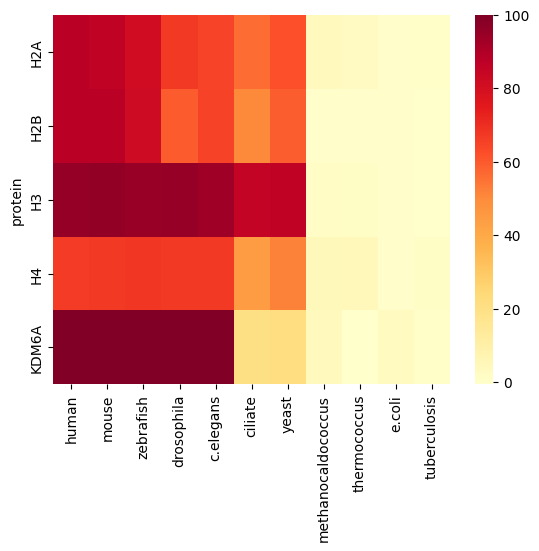

In [69]:
sns.heatmap(df_10, cmap='YlOrRd')

In [70]:
df.to_csv('/content/df.csv')

In [71]:
df_10.to_csv('/content/df_10.csv')